In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def step_signal (low, s_low, high, s_high, larg_high_i, larg_high_f, larg_low_i, larg_low_f, prob_positivo, n):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal

In [255]:
x0 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)
x1 = step_signal(3,0.2,7,0.3,20,100,20,100,0.5,100)

df = pd.DataFrame({'x0': x0})
pd.options.display.max_rows = len(x1)

if len(x0) > len(x1):
    if x1[len(x1)-1] >= 2.8 and x1[len(x1)-1] <= 3.2:
        x1 = np.concatenate((x1,np.random.uniform(3-0.2,3+0.2,len(x0)-len(x1))))
    elif x1[len(x1)-1] >= 6.7 and x1[len(x1)-1] <= 7.3:
        x1 = np.concatenate((x1,np.random.uniform(7-0.3,7+0.3,len(x0)-len(x1))))
else:
    delete = np.nonzero(x1[len(x0):])
    x1 = np.delete(x1,delete)

df['x1'] = x1    
df.head()

,x0,x1
0,2.878377,3.139681
1,2.856738,3.112678
2,3.116889,3.195002
3,2.933745,2.802333
4,2.868373,3.179866


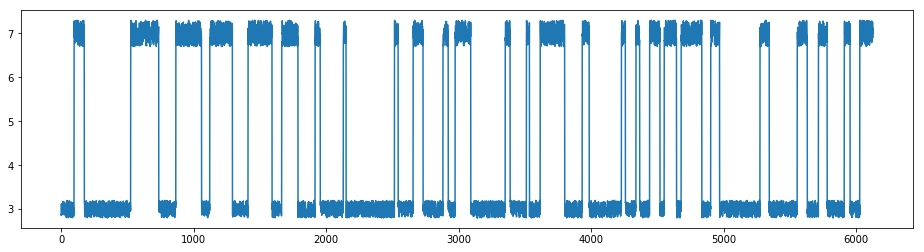

In [256]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])

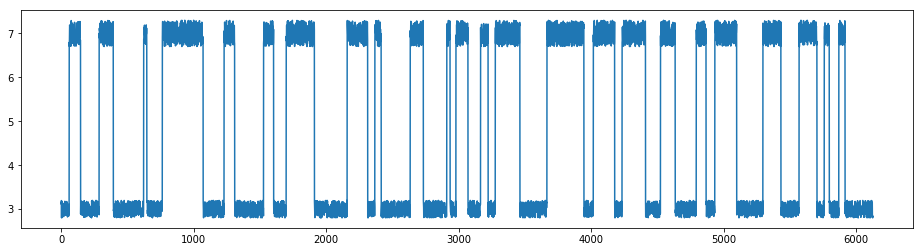

In [257]:
plt.figure(figsize=(16,4))
plt.plot(df['x1'])